In [1]:
library(tidyverse)
library(lubridate)
library(corrplot)

set.seed(1992)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

corrplot 0.84 loaded


# Functional Enrichment by Hand

In [4]:
ipr_scan <- read.csv('../vitvi.vcostv3.clean.pep.txt', sep='\t')
head(ipr_scan)

genename,sequence_md5,sequence_length,analysis,signature_accession,signature_description,start,end,e.value,status,date,ipr_accession,ipr_description,go_term,pathway_annotation
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,Pfam,PF13418,"Galactose oxidase, central domain",197,247,7.70e-07,TRUE,30-05-2019,,,,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,Pfam,PF13418,"Galactose oxidase, central domain",248,296,5.70e-06,TRUE,30-05-2019,,,,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,SUPERFAMILY,SSF57997,,572,707,3.04e-05,TRUE,30-05-2019,,,,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,SUPERFAMILY,SSF117281,,73,341,4.32e-56,TRUE,30-05-2019,IPR015915,Kelch-type beta propeller,GO:0005515,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,Gene3D,G3DSA:2.120.10.80,,72,349,1.20e-44,TRUE,30-05-2019,IPR015915,Kelch-type beta propeller,GO:0005515,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,Pfam,PF01344,Kelch motif,88,128,1.20e-06,TRUE,30-05-2019,IPR006652,Kelch repeat type 1,GO:0005515,


In [101]:
## need to filter for genes tested in DGE analysis

ipr_sub <- ipr_scan %>% 
  select(genename, e.value, ipr_accession) %>%
  filter(e.value < 1e-05) %>% 
  filter(ipr_accession != '') %>%
  select(genename, ipr_accession) %>%
  unique()

#also grab pfam
pfam_sub <- ipr_scan %>% 
  select(genename, analysis, signature_accession, signature_description, e.value, ipr_accession) %>%
  filter(e.value < 1e-05) %>% 
  filter(analysis == 'Pfam') %>%
  select(genename, signature_accession, signature_description, ipr_accession) %>%
  unique()

In [102]:
pfam_sub

,genename,signature_accession,signature_description,ipr_accession
1,Vitvi05g00341.t01,PF13418,"Galactose oxidase, central domain",
3,Vitvi05g00341.t01,PF01344,Kelch motif,IPR006652
4,Vitvi07g02478.t01,PF13962,Domain of unknown function,IPR026961
5,Vitvi15g00585.t01,PF07797,Protein of unknown function (DUF1639),IPR012438
6,Vitvi16g02000.t01,PF00069,Protein kinase domain,IPR000719
7,Vitvi16g02000.t01,PF13947,Wall-associated receptor kinase galacturonan-binding,IPR025287
8,Vitvi16g00435.t01,PF13855,Leucine rich repeat,IPR001611
9,Vitvi16g00435.t01,PF08263,Leucine rich repeat N-terminal domain,IPR013210
10,Vitvi04g00343.t01,PF00271,Helicase conserved C-terminal domain,IPR001650
11,Vitvi04g00343.t01,PF00270,DEAD/DEAH box helicase,IPR011545


In [73]:
example_dataset <- read.csv('all_rootstock_comparisons/Leaf_2018_Harvest_Ungrafted-1103P.csv')
all_genes <- paste(example_dataset$X, '.t01', sep='')

set_of_genes <- example_dataset %>%
  filter(padj < 0.05 & log2FoldChange > 0) %>%
  .[['X']] %>%
  paste('.t01', sep='')

length(set_of_genes)

[1] 4415

In [104]:
ipr_sub_mtv <- ipr_sub %>%
  filter(genename %in% all_genes)

pfam_sub_mtv <- pfam_sub %>%
  filter(genename %in% all_genes)

dim(ipr_sub_mtv)
dim(pfam_sub_mtv)

[1] 50361     2

[1] 24891     4

In [119]:
full_enrichment_test <- function(set_of_genes, ipr_sub, print_res=FALSE){
    ipr_testset <- ipr_sub[ipr_sub$genename %in% set_of_genes,]
    terms <- unique(ipr_testset$ipr_accession)
    
    print(str_interp("analyzing ${length(terms)} IPR accessions..."))
    
    enriched_terms <- c()
    for (term in terms){
        
        genes_to_term_in_set <- nrow(ipr_testset[ipr_testset$ipr_accession == term,])
        genes_to_term_in_genome <- nrow(ipr_sub[ipr_sub$ipr_accession == term,])
        genes_not_term_in_genome <- 24769 - genes_to_term_in_genome
        size_of_set <- length(set_of_genes)
        
        test <- phyper(genes_to_term_in_set, genes_to_term_in_genome,
                       genes_not_term_in_genome, size_of_set, lower.tail=FALSE)
        
        if (test < 0.05/length(terms) & genes_to_term_in_genome >= 10){
            if (print_res == TRUE)
            print(c(term, test, genes_to_term_in_set, genes_to_term_in_genome))
            enriched_terms <- c(enriched_terms, term)
        }
        
    }
    
    return(enriched_terms)

}

full_pfam_enrichment_test <- function(set_of_genes, pfam_sub, print_res=FALSE){
    pfam_testset <- pfam_sub[pfam_sub$genename %in% set_of_genes,]
    terms <- unique(pfam_testset$signature_accession)
    
    print(str_interp("analyzing ${length(terms)} Pfam domains..."))
    
    enriched_terms <- c()
    for (term in terms){
        
        genes_to_term_in_set <- nrow(pfam_testset[pfam_testset$signature_accession == term,])
        genes_to_term_in_genome <- nrow(pfam_sub[pfam_sub$signature_accession == term,])
        genes_not_term_in_genome <- 24769 - genes_to_term_in_genome
        size_of_set <- length(set_of_genes)
        
        test <- phyper(genes_to_term_in_set, genes_to_term_in_genome,
                       genes_not_term_in_genome, size_of_set, lower.tail=FALSE)
        
        if (test < 0.05/length(terms) & genes_to_term_in_genome >= 10){
            if (print_res == TRUE){
                print(c(term, test, genes_to_term_in_set, genes_to_term_in_genome))
            }
            enriched_terms <- c(enriched_terms, term)
        }
        
    }
    
    return(enriched_terms)

}

In [108]:
eset <- full_enrichment_test(set_of_genes, ipr_sub_mtv)
pset <- full_pfam_enrichment_test(set_of_genes, pfam_sub_mtv)

[1] "analyzing 2634 IPR accessions..."
[1] "IPR013583"            "7.00175562608706e-06" "8"                   
[4] "11"                  
[1] "IPR025757"            "3.12170325421978e-07" "10"                  
[4] "13"                  
[1] "IPR004159"            "6.93261006123533e-08" "15"                  
[4] "23"                  
[1] "IPR012946"            "5.05674359501684e-12" "24"                  
[4] "35"                  
[1] "IPR000490"            "6.95443372984339e-08" "21"                  
[4] "39"                  
[1] "IPR017853"            "1.68710987209878e-05" "59"                  
[4] "200"                 
[1] "IPR006458"            "2.96041531720057e-07" "9"                   
[4] "11"                  
[1] "IPR036915"            "1.07341751878546e-05" "21"                  
[4] "49"                  
[1] "IPR004367"            "1.08415321460321e-07" "16"                  
[4] "26"                  
[1] "IPR013763"           "1.7438921620823e-05" "17"         

In [98]:
ipr_scan %>%
  select(ipr_accession, ipr_description) %>%
  unique() %>%
  filter(ipr_accession %in% eset)

ipr_accession,ipr_description
IPR013583,Phosphoribosyltransferase C-terminal
IPR025757,"Ternary complex factor MIP1, leucine-zipper"
IPR017853,Glycoside hydrolase superfamily
IPR004159,Putative S-adenosyl-L-methionine-dependent methyltransferase
IPR029058,Alpha/Beta hydrolase fold
IPR016140,Bifunctional inhibitor/plant lipid transfer protein/seed storage helical domain
IPR036312,Bifunctional inhibitor/plant lipid transfer protein/seed storage helical domain superfamily
IPR012946,X8 domain
IPR000490,Glycoside hydrolase family 17
IPR036893,SBP domain superfamily


In [109]:
ipr_scan %>%
  filter(analysis == 'Pfam') %>% 
  select(signature_accession, signature_description) %>%
  unique() %>%
  filter(signature_accession %in% pset)

signature_accession,signature_description
PF08372,Plant phosphoribosyltransferase C-terminal
PF14389,Leucine-zipper of ternary complex factor MIP1
PF03141,Putative S-adenosyl-L-methionine-dependent methyltransferase
PF00332,Glycosyl hydrolases family 17
PF07983,X8 domain
PF03110,SBP domain
PF07731,Multicopper oxidase
PF07732,Multicopper oxidase
PF00394,Multicopper oxidase
PF04844,"Transcriptional repressor, ovate"


In [120]:
## make whole analysis into a function

functional_enrichment <- function(file, ipr_scan, ipr_sub, pfam_sub){
    example_dataset <- read.csv(file)
    all_genes <- paste(example_dataset$X, '.t01', sep='')

    # get up regulated genes
    up_genes <- example_dataset %>%
      filter(padj < 0.05 & log2FoldChange > 0) %>%
      .[['X']] %>%
      paste('.t01', sep='')
    
    #get down regulated genes
    down_genes <- example_dataset %>%
      filter(padj < 0.05 & log2FoldChange < 0) %>%
      .[['X']] %>%
      paste('.t01', sep='')

    #filter for genes in DEG analysis
    ipr_sub_mtv <- ipr_sub %>%
      filter(genename %in% all_genes)

    pfam_sub_mtv <- pfam_sub %>%
      filter(genename %in% all_genes)
    
    #run ipr and pfam enrichments - Up regulation
    eset_up <- full_enrichment_test(up_genes, ipr_sub_mtv)
    pset_up <- full_pfam_enrichment_test(up_genes, pfam_sub_mtv)
    
    #run ipr and pfam enrichments - Down regulation
    eset_down <- full_enrichment_test(down_genes, ipr_sub_mtv)
    pset_down <- full_pfam_enrichment_test(down_genes, pfam_sub_mtv)    
    
    #make output tables
    ipr_up <- ipr_scan %>%
      select(ipr_accession, ipr_description) %>%
      unique() %>%
      filter(ipr_accession %in% eset_up)
    
    pfam_up <- ipr_scan %>%
      filter(analysis == 'Pfam') %>% 
      select(signature_accession, signature_description) %>%
      unique() %>%
      filter(signature_accession %in% pset_up)
    
    ipr_down <- ipr_scan %>%
      select(ipr_accession, ipr_description) %>%
      unique() %>%
      filter(ipr_accession %in% eset_down)
    
    pfam_down <- ipr_scan %>%
      filter(analysis == 'Pfam') %>% 
      select(signature_accession, signature_description) %>%
      unique() %>%
      filter(signature_accession %in% pset_down)
    
    output <- list()
    output[['full_eset_up']] <- eset_up
    output[['full_pset_up']] <- eset_up
    output[['full_eset_down']] <- eset_down
    output[['full_pset_down']] <- eset_down
    
    output[['pretty_eset_up']] <- ipr_up
    output[['pretty_pset_up']] <- pfam_up
    output[['pretty_eset_down']] <- ipr_down
    output[['pretty_pset_down']] <- pfam_down
    
    return(output)
}

In [131]:
UG_1103P <- functional_enrichment('all_rootstock_comparisons/Leaf_2018_Harvest_Ungrafted-1103P.csv',
                                     ipr_scan=ipr_scan, ipr_sub=ipr_sub, pfam_sub=pfam_sub)

UG_3309C <- functional_enrichment('all_rootstock_comparisons/Leaf_2018_Harvest_Ungrafted-3309C.csv',
                                     ipr_scan=ipr_scan, ipr_sub=ipr_sub, pfam_sub=pfam_sub)

UG_SO4 <- functional_enrichment('all_rootstock_comparisons/Leaf_2018_Harvest_Ungrafted-SO4.csv',
                                     ipr_scan=ipr_scan, ipr_sub=ipr_sub, pfam_sub=pfam_sub)

[1] "analyzing 2634 IPR accessions..."
[1] "analyzing 1570 Pfam domains..."
[1] "analyzing 1884 IPR accessions..."
[1] "analyzing 1139 Pfam domains..."
[1] "analyzing 1991 IPR accessions..."
[1] "analyzing 1180 Pfam domains..."
[1] "analyzing 1205 IPR accessions..."
[1] "analyzing 723 Pfam domains..."
[1] "analyzing 2595 IPR accessions..."
[1] "analyzing 1567 Pfam domains..."
[1] "analyzing 1603 IPR accessions..."
[1] "analyzing 959 Pfam domains..."


In [141]:
sum(UG_1103P[['pretty_pset_up']]$signature_accession %in% UG_3309C[['pretty_pset_up']]$signature_accession )
sum(UG_1103P[['pretty_pset_up']]$signature_accession %in% UG_SO4[['pretty_pset_up']]$signature_accession)
sum(UG_3309C[['pretty_pset_up']]$signature_accession %in% UG_SO4[['pretty_pset_up']]$signature_accession)


sum(UG_1103P[['pretty_pset_down']]$signature_accession %in% UG_3309C[['pretty_pset_down']]$signature_accession )
sum(UG_1103P[['pretty_pset_down']]$signature_accession %in% UG_SO4[['pretty_pset_down']]$signature_accession)
sum(UG_3309C[['pretty_pset_down']]$signature_accession %in% UG_SO4[['pretty_pset_down']]$signature_accession)

[1] 23

[1] 22

[1] 20

[1] 4

[1] 2

[1] 1

In [143]:
sum(UG_1103P[['pretty_eset_up']]$ipr_accession %in% UG_3309C[['pretty_eset_up']]$ipr_accession )
sum(UG_1103P[['pretty_eset_up']]$ipr_accession %in% UG_SO4[['pretty_eset_up']]$ipr_accession)
sum(UG_3309C[['pretty_eset_up']]$ipr_accession %in% UG_SO4[['pretty_eset_up']]$ipr_accession)


sum(UG_1103P[['pretty_eset_down']]$ipr_accession %in% UG_3309C[['pretty_eset_down']]$ipr_accession )
sum(UG_1103P[['pretty_eset_down']]$ipr_accession %in% UG_SO4[['pretty_eset_down']]$ipr_accession)
sum(UG_3309C[['pretty_eset_down']]$ipr_accession %in% UG_SO4[['pretty_eset_down']]$ipr_accession)

[1] 32

[1] 33

[1] 26

[1] 6

[1] 7

[1] 2

In [146]:
UG_1103P[['pretty_pset_down']]
UG_3309C[['pretty_pset_down']]
UG_SO4[['pretty_pset_down']]

signature_accession,signature_description
PF00201,UDP-glucoronosyl and UDP-glucosyl transferase
PF08276,PAN-like domain
PF00179,Ubiquitin-conjugating enzyme
PF03171,2OG-Fe(II) oxygenase superfamily
PF14226,non-haem dioxygenase in morphine synthesis N-terminal
PF00564,PB1 domain
PF00067,Cytochrome P450
PF03106,WRKY DNA -binding domain
PF03357,Snf7


signature_accession,signature_description
PF00201,UDP-glucoronosyl and UDP-glucosyl transferase
PF03171,2OG-Fe(II) oxygenase superfamily
PF14226,non-haem dioxygenase in morphine synthesis N-terminal
PF00564,PB1 domain
PF13837,Myb/SANT-like DNA-binding domain
PF05920,Homeobox KN domain
PF07526,Associated with HOX
PF05678,VQ motif


signature_accession,signature_description
PF00128,"Alpha amylase, catalytic domain"
PF13639,Ring finger domain
PF00564,PB1 domain
PF00067,Cytochrome P450
PF00326,Prolyl oligopeptidase family


# Functional Enrichment by Hand

In [4]:
ipr_scan <- read.csv('../vitvi.vcostv3.clean.pep.txt', sep='\t')
head(ipr_scan)

genename,sequence_md5,sequence_length,analysis,signature_accession,signature_description,start,end,e.value,status,date,ipr_accession,ipr_description,go_term,pathway_annotation
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,Pfam,PF13418,"Galactose oxidase, central domain",197,247,7.70e-07,TRUE,30-05-2019,,,,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,Pfam,PF13418,"Galactose oxidase, central domain",248,296,5.70e-06,TRUE,30-05-2019,,,,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,SUPERFAMILY,SSF57997,,572,707,3.04e-05,TRUE,30-05-2019,,,,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,SUPERFAMILY,SSF117281,,73,341,4.32e-56,TRUE,30-05-2019,IPR015915,Kelch-type beta propeller,GO:0005515,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,Gene3D,G3DSA:2.120.10.80,,72,349,1.20e-44,TRUE,30-05-2019,IPR015915,Kelch-type beta propeller,GO:0005515,
Vitvi05g00341.t01,919f24f8b888529e4f17d32b1fe13c45,717,Pfam,PF01344,Kelch motif,88,128,1.20e-06,TRUE,30-05-2019,IPR006652,Kelch repeat type 1,GO:0005515,


In [101]:
## need to filter for genes tested in DGE analysis

ipr_sub <- ipr_scan %>% 
  select(genename, e.value, ipr_accession) %>%
  filter(e.value < 1e-05) %>% 
  filter(ipr_accession != '') %>%
  select(genename, ipr_accession) %>%
  unique()

#also grab pfam
pfam_sub <- ipr_scan %>% 
  select(genename, analysis, signature_accession, signature_description, e.value, ipr_accession) %>%
  filter(e.value < 1e-05) %>% 
  filter(analysis == 'Pfam') %>%
  select(genename, signature_accession, signature_description, ipr_accession) %>%
  unique()

In [102]:
pfam_sub

,genename,signature_accession,signature_description,ipr_accession
1,Vitvi05g00341.t01,PF13418,"Galactose oxidase, central domain",
3,Vitvi05g00341.t01,PF01344,Kelch motif,IPR006652
4,Vitvi07g02478.t01,PF13962,Domain of unknown function,IPR026961
5,Vitvi15g00585.t01,PF07797,Protein of unknown function (DUF1639),IPR012438
6,Vitvi16g02000.t01,PF00069,Protein kinase domain,IPR000719
7,Vitvi16g02000.t01,PF13947,Wall-associated receptor kinase galacturonan-binding,IPR025287
8,Vitvi16g00435.t01,PF13855,Leucine rich repeat,IPR001611
9,Vitvi16g00435.t01,PF08263,Leucine rich repeat N-terminal domain,IPR013210
10,Vitvi04g00343.t01,PF00271,Helicase conserved C-terminal domain,IPR001650
11,Vitvi04g00343.t01,PF00270,DEAD/DEAH box helicase,IPR011545


In [73]:
example_dataset <- read.csv('all_rootstock_comparisons/Leaf_2018_Harvest_Ungrafted-1103P.csv')
all_genes <- paste(example_dataset$X, '.t01', sep='')

set_of_genes <- example_dataset %>%
  filter(padj < 0.05 & log2FoldChange > 0) %>%
  .[['X']] %>%
  paste('.t01', sep='')

length(set_of_genes)

[1] 4415

In [104]:
ipr_sub_mtv <- ipr_sub %>%
  filter(genename %in% all_genes)

pfam_sub_mtv <- pfam_sub %>%
  filter(genename %in% all_genes)

dim(ipr_sub_mtv)
dim(pfam_sub_mtv)

[1] 50361     2

[1] 24891     4

In [119]:
full_enrichment_test <- function(set_of_genes, ipr_sub, print_res=FALSE){
    ipr_testset <- ipr_sub[ipr_sub$genename %in% set_of_genes,]
    terms <- unique(ipr_testset$ipr_accession)
    
    print(str_interp("analyzing ${length(terms)} IPR accessions..."))
    
    enriched_terms <- c()
    for (term in terms){
        
        genes_to_term_in_set <- nrow(ipr_testset[ipr_testset$ipr_accession == term,])
        genes_to_term_in_genome <- nrow(ipr_sub[ipr_sub$ipr_accession == term,])
        genes_not_term_in_genome <- 24769 - genes_to_term_in_genome
        size_of_set <- length(set_of_genes)
        
        test <- phyper(genes_to_term_in_set, genes_to_term_in_genome,
                       genes_not_term_in_genome, size_of_set, lower.tail=FALSE)
        
        if (test < 0.05/length(terms) & genes_to_term_in_genome >= 10){
            if (print_res == TRUE)
            print(c(term, test, genes_to_term_in_set, genes_to_term_in_genome))
            enriched_terms <- c(enriched_terms, term)
        }
        
    }
    
    return(enriched_terms)

}

full_pfam_enrichment_test <- function(set_of_genes, pfam_sub, print_res=FALSE){
    pfam_testset <- pfam_sub[pfam_sub$genename %in% set_of_genes,]
    terms <- unique(pfam_testset$signature_accession)
    
    print(str_interp("analyzing ${length(terms)} Pfam domains..."))
    
    enriched_terms <- c()
    for (term in terms){
        
        genes_to_term_in_set <- nrow(pfam_testset[pfam_testset$signature_accession == term,])
        genes_to_term_in_genome <- nrow(pfam_sub[pfam_sub$signature_accession == term,])
        genes_not_term_in_genome <- 24769 - genes_to_term_in_genome
        size_of_set <- length(set_of_genes)
        
        test <- phyper(genes_to_term_in_set, genes_to_term_in_genome,
                       genes_not_term_in_genome, size_of_set, lower.tail=FALSE)
        
        if (test < 0.05/length(terms) & genes_to_term_in_genome >= 10){
            if (print_res == TRUE){
                print(c(term, test, genes_to_term_in_set, genes_to_term_in_genome))
            }
            enriched_terms <- c(enriched_terms, term)
        }
        
    }
    
    return(enriched_terms)

}

In [108]:
eset <- full_enrichment_test(set_of_genes, ipr_sub_mtv)
pset <- full_pfam_enrichment_test(set_of_genes, pfam_sub_mtv)

[1] "analyzing 2634 IPR accessions..."
[1] "IPR013583"            "7.00175562608706e-06" "8"                   
[4] "11"                  
[1] "IPR025757"            "3.12170325421978e-07" "10"                  
[4] "13"                  
[1] "IPR004159"            "6.93261006123533e-08" "15"                  
[4] "23"                  
[1] "IPR012946"            "5.05674359501684e-12" "24"                  
[4] "35"                  
[1] "IPR000490"            "6.95443372984339e-08" "21"                  
[4] "39"                  
[1] "IPR017853"            "1.68710987209878e-05" "59"                  
[4] "200"                 
[1] "IPR006458"            "2.96041531720057e-07" "9"                   
[4] "11"                  
[1] "IPR036915"            "1.07341751878546e-05" "21"                  
[4] "49"                  
[1] "IPR004367"            "1.08415321460321e-07" "16"                  
[4] "26"                  
[1] "IPR013763"           "1.7438921620823e-05" "17"         

In [98]:
ipr_scan %>%
  select(ipr_accession, ipr_description) %>%
  unique() %>%
  filter(ipr_accession %in% eset)

ipr_accession,ipr_description
IPR013583,Phosphoribosyltransferase C-terminal
IPR025757,"Ternary complex factor MIP1, leucine-zipper"
IPR017853,Glycoside hydrolase superfamily
IPR004159,Putative S-adenosyl-L-methionine-dependent methyltransferase
IPR029058,Alpha/Beta hydrolase fold
IPR016140,Bifunctional inhibitor/plant lipid transfer protein/seed storage helical domain
IPR036312,Bifunctional inhibitor/plant lipid transfer protein/seed storage helical domain superfamily
IPR012946,X8 domain
IPR000490,Glycoside hydrolase family 17
IPR036893,SBP domain superfamily


In [109]:
ipr_scan %>%
  filter(analysis == 'Pfam') %>% 
  select(signature_accession, signature_description) %>%
  unique() %>%
  filter(signature_accession %in% pset)

signature_accession,signature_description
PF08372,Plant phosphoribosyltransferase C-terminal
PF14389,Leucine-zipper of ternary complex factor MIP1
PF03141,Putative S-adenosyl-L-methionine-dependent methyltransferase
PF00332,Glycosyl hydrolases family 17
PF07983,X8 domain
PF03110,SBP domain
PF07731,Multicopper oxidase
PF07732,Multicopper oxidase
PF00394,Multicopper oxidase
PF04844,"Transcriptional repressor, ovate"


In [120]:
## make whole analysis into a function

functional_enrichment <- function(file, ipr_scan, ipr_sub, pfam_sub){
    example_dataset <- read.csv(file)
    all_genes <- paste(example_dataset$X, '.t01', sep='')

    # get up regulated genes
    up_genes <- example_dataset %>%
      filter(padj < 0.05 & log2FoldChange > 0) %>%
      .[['X']] %>%
      paste('.t01', sep='')
    
    #get down regulated genes
    down_genes <- example_dataset %>%
      filter(padj < 0.05 & log2FoldChange < 0) %>%
      .[['X']] %>%
      paste('.t01', sep='')

    #filter for genes in DEG analysis
    ipr_sub_mtv <- ipr_sub %>%
      filter(genename %in% all_genes)

    pfam_sub_mtv <- pfam_sub %>%
      filter(genename %in% all_genes)
    
    #run ipr and pfam enrichments - Up regulation
    eset_up <- full_enrichment_test(up_genes, ipr_sub_mtv)
    pset_up <- full_pfam_enrichment_test(up_genes, pfam_sub_mtv)
    
    #run ipr and pfam enrichments - Down regulation
    eset_down <- full_enrichment_test(down_genes, ipr_sub_mtv)
    pset_down <- full_pfam_enrichment_test(down_genes, pfam_sub_mtv)    
    
    #make output tables
    ipr_up <- ipr_scan %>%
      select(ipr_accession, ipr_description) %>%
      unique() %>%
      filter(ipr_accession %in% eset_up)
    
    pfam_up <- ipr_scan %>%
      filter(analysis == 'Pfam') %>% 
      select(signature_accession, signature_description) %>%
      unique() %>%
      filter(signature_accession %in% pset_up)
    
    ipr_down <- ipr_scan %>%
      select(ipr_accession, ipr_description) %>%
      unique() %>%
      filter(ipr_accession %in% eset_down)
    
    pfam_down <- ipr_scan %>%
      filter(analysis == 'Pfam') %>% 
      select(signature_accession, signature_description) %>%
      unique() %>%
      filter(signature_accession %in% pset_down)
    
    output <- list()
    output[['full_eset_up']] <- eset_up
    output[['full_pset_up']] <- eset_up
    output[['full_eset_down']] <- eset_down
    output[['full_pset_down']] <- eset_down
    
    output[['pretty_eset_up']] <- ipr_up
    output[['pretty_pset_up']] <- pfam_up
    output[['pretty_eset_down']] <- ipr_down
    output[['pretty_pset_down']] <- pfam_down
    
    return(output)
}

In [131]:
UG_1103P <- functional_enrichment('all_rootstock_comparisons/Leaf_2018_Harvest_Ungrafted-1103P.csv',
                                     ipr_scan=ipr_scan, ipr_sub=ipr_sub, pfam_sub=pfam_sub)

UG_3309C <- functional_enrichment('all_rootstock_comparisons/Leaf_2018_Harvest_Ungrafted-3309C.csv',
                                     ipr_scan=ipr_scan, ipr_sub=ipr_sub, pfam_sub=pfam_sub)

UG_SO4 <- functional_enrichment('all_rootstock_comparisons/Leaf_2018_Harvest_Ungrafted-SO4.csv',
                                     ipr_scan=ipr_scan, ipr_sub=ipr_sub, pfam_sub=pfam_sub)

[1] "analyzing 2634 IPR accessions..."
[1] "analyzing 1570 Pfam domains..."
[1] "analyzing 1884 IPR accessions..."
[1] "analyzing 1139 Pfam domains..."
[1] "analyzing 1991 IPR accessions..."
[1] "analyzing 1180 Pfam domains..."
[1] "analyzing 1205 IPR accessions..."
[1] "analyzing 723 Pfam domains..."
[1] "analyzing 2595 IPR accessions..."
[1] "analyzing 1567 Pfam domains..."
[1] "analyzing 1603 IPR accessions..."
[1] "analyzing 959 Pfam domains..."


In [141]:
sum(UG_1103P[['pretty_pset_up']]$signature_accession %in% UG_3309C[['pretty_pset_up']]$signature_accession )
sum(UG_1103P[['pretty_pset_up']]$signature_accession %in% UG_SO4[['pretty_pset_up']]$signature_accession)
sum(UG_3309C[['pretty_pset_up']]$signature_accession %in% UG_SO4[['pretty_pset_up']]$signature_accession)


sum(UG_1103P[['pretty_pset_down']]$signature_accession %in% UG_3309C[['pretty_pset_down']]$signature_accession )
sum(UG_1103P[['pretty_pset_down']]$signature_accession %in% UG_SO4[['pretty_pset_down']]$signature_accession)
sum(UG_3309C[['pretty_pset_down']]$signature_accession %in% UG_SO4[['pretty_pset_down']]$signature_accession)

[1] 23

[1] 22

[1] 20

[1] 4

[1] 2

[1] 1

In [143]:
sum(UG_1103P[['pretty_eset_up']]$ipr_accession %in% UG_3309C[['pretty_eset_up']]$ipr_accession )
sum(UG_1103P[['pretty_eset_up']]$ipr_accession %in% UG_SO4[['pretty_eset_up']]$ipr_accession)
sum(UG_3309C[['pretty_eset_up']]$ipr_accession %in% UG_SO4[['pretty_eset_up']]$ipr_accession)


sum(UG_1103P[['pretty_eset_down']]$ipr_accession %in% UG_3309C[['pretty_eset_down']]$ipr_accession )
sum(UG_1103P[['pretty_eset_down']]$ipr_accession %in% UG_SO4[['pretty_eset_down']]$ipr_accession)
sum(UG_3309C[['pretty_eset_down']]$ipr_accession %in% UG_SO4[['pretty_eset_down']]$ipr_accession)

[1] 32

[1] 33

[1] 26

[1] 6

[1] 7

[1] 2

In [146]:
UG_1103P[['pretty_pset_down']]
UG_3309C[['pretty_pset_down']]
UG_SO4[['pretty_pset_down']]

signature_accession,signature_description
PF00201,UDP-glucoronosyl and UDP-glucosyl transferase
PF08276,PAN-like domain
PF00179,Ubiquitin-conjugating enzyme
PF03171,2OG-Fe(II) oxygenase superfamily
PF14226,non-haem dioxygenase in morphine synthesis N-terminal
PF00564,PB1 domain
PF00067,Cytochrome P450
PF03106,WRKY DNA -binding domain
PF03357,Snf7


signature_accession,signature_description
PF00201,UDP-glucoronosyl and UDP-glucosyl transferase
PF03171,2OG-Fe(II) oxygenase superfamily
PF14226,non-haem dioxygenase in morphine synthesis N-terminal
PF00564,PB1 domain
PF13837,Myb/SANT-like DNA-binding domain
PF05920,Homeobox KN domain
PF07526,Associated with HOX
PF05678,VQ motif


signature_accession,signature_description
PF00128,"Alpha amylase, catalytic domain"
PF13639,Ring finger domain
PF00564,PB1 domain
PF00067,Cytochrome P450
PF00326,Prolyl oligopeptidase family


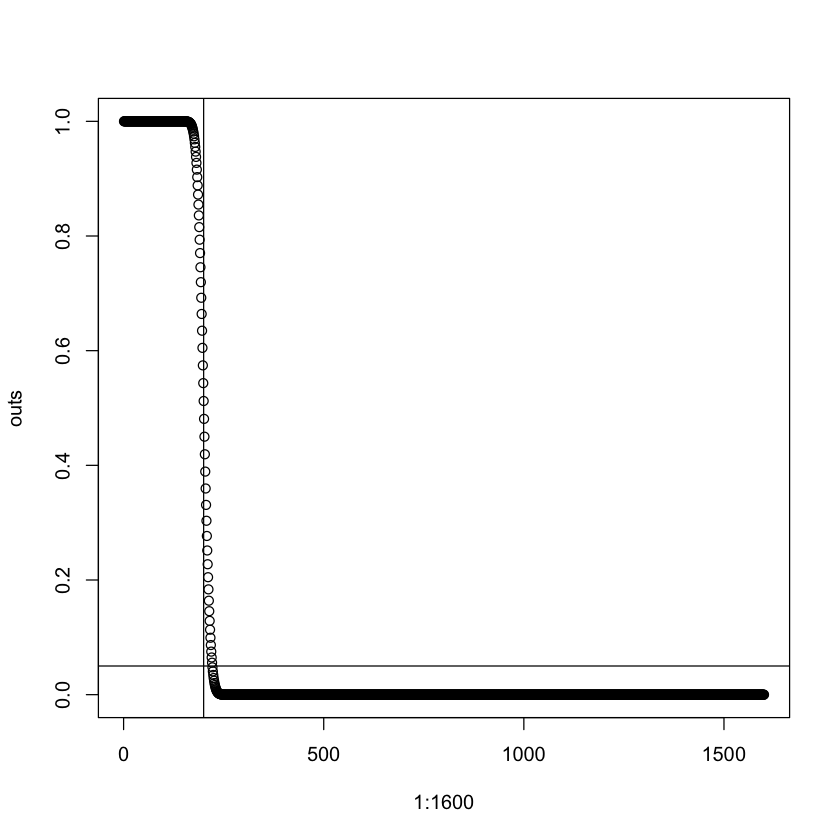

In [40]:
outs <- c()
for (i in 1:1600){
  outs <- c(outs, phyper(i-1, 1600, 24000-1600, 3000, lower.tail=FALSE))
}

plot(1:1600, outs)
abline(v=200, h=0.05)

[1] 200